In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in /anaconda3/lib/python3.7/site-packages (1.16.3)


In [4]:
!pip install mlxtend  


In [5]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from sklearn import metrics
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline

Using TensorFlow backend.


In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector


In [17]:
DataSet = pd.read_csv('Features_Variant_1.csv', names=["Page_Likes","Page_Checkins","Page talking about","Page Category","Derived5","Derived6","Derived7","Derived8",
          "Derived9","Derived10","Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17",
          "Derived18","Derived19","Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
          "CC1","CC2","CC3","CC4","CC5","Base Time","Post_Length","Post Share Count","Post Promotion Status","H Local","PSun","PMon","PTue","PWed","PThurs","PFri","PSat",
          "BSun","BMon","BTue","BWed","BThurs","BFri","BSat","Target_Variable"])

In [18]:
DataSet['response']=  np.where(DataSet['Target_Variable']>100,1,0)

In [19]:
DataSet.head()

,Page_Likes,Page_Checkins,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,PSat,BSun,BMon,BTue,BWed,BThurs,BFri,BSat,Target_Variable,response
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,1,0,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
def normalizeValues(df):
    result = (df - df.mean())/df.std()
    return result

In [22]:
DataSet = DataSet.drop(["Page Category","Derived5","Derived6","Derived7","Derived8",
          "Derived9","Derived10","Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17",
          "Derived18","Derived19","Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
          "CC4","CC5","Post Promotion Status","PSat",
          "BSun","BMon","BTue","BWed","BThurs","BFri","BSat", "Target_Variable"], axis=1)

In [23]:
DataSet.head()

,Page_Likes,Page_Checkins,Page talking about,CC1,CC2,CC3,Base Time,Post_Length,Post Share Count,H Local,PSun,PMon,PTue,PWed,PThurs,PFri,response
0,634995,0,463,0,0,0,65,166,2,24,0,0,0,1,0,0,0
1,634995,0,463,0,0,0,10,132,1,24,0,0,0,0,1,0,0
2,634995,0,463,0,0,0,14,133,2,24,0,0,0,0,0,1,0
3,634995,0,463,7,0,3,62,131,1,24,0,0,0,0,0,1,0
4,634995,0,463,1,0,0,58,142,5,24,0,1,0,0,0,0,0


In [27]:
X = normalizeValues(DataSet)
X = pd.DataFrame(X)
X.head()

,Page_Likes,Page_Checkins,Page talking about,CC1,CC2,CC3,Base Time,Post_Length,Post Share Count,H Local,PSun,PMon,PTue,PWed,PThurs,PFri,response
0,-0.100036,-0.227072,-0.399673,-0.406790,-0.287674,-0.276450,1.418853,0.006239,-0.121957,0.120931,-0.373362,-0.408982,-0.419662,2.312906,-0.410201,-0.413729,-0.120699
1,-0.100036,-0.227072,-0.399673,-0.406790,-0.287674,-0.276450,-1.210604,-0.084123,-0.123015,0.120931,-0.373362,-0.408982,-0.419662,-0.432346,2.437769,-0.413729,-0.120699
2,-0.100036,-0.227072,-0.399673,-0.406790,-0.287674,-0.276450,-1.019371,-0.081465,-0.121957,0.120931,-0.373362,-0.408982,-0.419662,-0.432346,-0.410201,2.416981,-0.120699
3,-0.100036,-0.227072,-0.399673,-0.355686,-0.287674,-0.234243,1.275429,-0.086781,-0.123015,0.120931,-0.373362,-0.408982,-0.419662,-0.432346,-0.410201,2.416981,-0.120699
4,-0.100036,-0.227072,-0.399673,-0.399490,-0.287674,-0.276450,1.084195,-0.057546,-0.118782,0.120931,-0.373362,2.445038,-0.419662,-0.432346,-0.410201,-0.413729,-0.120699


In [30]:
X = normalizeValues(DataSet.iloc[:,0:10])
X = np.concatenate((X, DataSet.iloc[:,10:16]), axis = 1)
X = pd.DataFrame(X)
Y = DataSet.iloc[:, 16:17]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [32]:
model_k = KMeans(n_clusters=2, random_state=101)
model_k.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [33]:
# Validation prediction
prediction_v = model_k.predict(X_train)

In [34]:
prediction_k = model_k.predict(X_test)

In [35]:
accuracy_score(y_test, prediction_k)*100

93.80545380545381

In [36]:
print(confusion_matrix(y_test,prediction_k))

[[11439   678]
 [   83    85]]


In [37]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

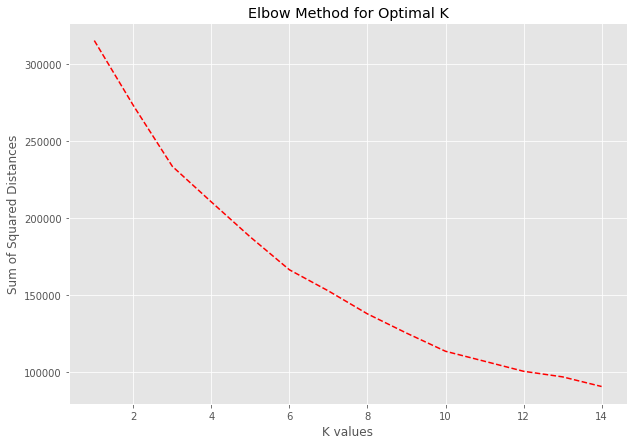

In [38]:
plt.figure(figsize=(10,7))
plt.title("Elbow Method for Optimal K")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.plot(K, Sum_of_squared_distances, color = 'red', linestyle = 'dashed')
plt.savefig("Elbow_chart_withoutFeatureSelection.jpg")

In [39]:
Gaussian = GaussianMixture(n_components=2,random_state=0)#covariance_type='tied')
Gaussian.fit(X_train)
predictions = Gaussian.predict(X_train)
probs = Gaussian.predict_proba(X_train)
print(confusion_matrix(y_train,predictions))

[[21645  6599]
 [   54   366]]


In [40]:
acc= round(100*accuracy_score(y_train,predictions),2)
print(acc)

76.79


In [41]:
def GMM_def(X_train, n = 2):
    Gaussian1 = GaussianMixture(n_components=n,random_state=10)
    Gaussian1.fit(X_train)
    predictions1 = Gaussian1.predict(X_train)
    return round(100*accuracy_score(y_train,predictions),2)

In [42]:
estimator = ExtraTreesClassifier(n_estimators = 100)
featureSelection = SelectFromModel(estimator)
featureSelection.fit(X_train, y_train)
selectedFeatures = featureSelection.transform(X_train)
selectedFeatures

/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


array([[-0.16266949, -0.40217907, -0.39218914, ..., -0.06320425,
        -0.4349401 , -0.0764543 ],
       [-0.18745171, -0.3061308 , -0.20237446, ..., -1.35402873,
        -0.4349401 , -0.12195662],
       [-0.18319544, -0.33860963, -0.34838575, ..., -0.20662919,
         0.12849351, -0.12195662],
       ...,
       [ 0.71140493,  2.21077574,  0.24295999, ..., -1.06717885,
        -0.4349401 ,  0.31507733],
       [-0.14079733, -0.33035245,  0.3232662 , ...,  0.89296203,
        -0.3897591 ,  0.21772352],
       [ 0.18215421,  1.19255584, -0.24617784, ..., -0.39786245,
        -0.02299572, -0.1092583 ]])

In [43]:
X_train.columns[featureSelection.get_support()]

Int64Index([0, 2, 3, 4, 6, 7, 8], dtype='int64')

In [47]:
feature_selected_X_train = X_train.loc[:,[0, 2, 3, 4,
       6, 7, 8,]]

In [48]:
feature_selected_X_train.head()

,0,2,3,4,6,7,8
13818,-0.162669,-0.402179,-0.392189,-0.287674,-0.063204,-0.434940,-0.076454
30265,-0.187452,-0.306131,-0.202374,0.075376,-1.354029,-0.434940,-0.121957
34860,-0.183195,-0.338610,-0.348386,-0.235810,-0.206629,0.128494,-0.121957
29230,-0.109271,-0.158223,-0.282681,-0.287674,1.466662,-0.110700,-0.121957
6443,-0.188811,-0.398186,-0.406790,-0.287674,-1.401837,-0.041600,-0.123015


In [49]:
feature_selected_X_test = X_test.loc[:,[0, 2, 3, 4,
       6, 7, 8,]]

In [50]:
model_feature = KMeans(n_clusters=2, random_state=101)
model_feature.fit(feature_selected_X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [51]:
# VALIDATION
prediction_feature_valid = model_feature.predict(feature_selected_X_train)
valid_feature = accuracy_score(y_train, prediction_feature_valid)
print(accuracy_score(y_train, prediction_feature_valid)*100)
# TEST RESULTS
prediction_feature_test = model_feature.predict(feature_selected_X_test)
test_feature = accuracy_score(y_test, prediction_feature_test)
print(accuracy_score(y_test, prediction_feature_test)*100)

print(confusion_matrix(y_test,prediction_feature_test))

98.51730393524979
98.61619861619862
[[12115     2]
 [  168     0]]


In [52]:
pca = PCA()

pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [53]:
pca.explained_variance_ratio_

array([0.24818797, 0.14452889, 0.10543107, 0.09347719, 0.08689113,
       0.0862053 , 0.06843772, 0.0619706 , 0.02871241, 0.01385761,
       0.01313056, 0.01309659, 0.01298724, 0.01150569, 0.00977769,
       0.00180233])

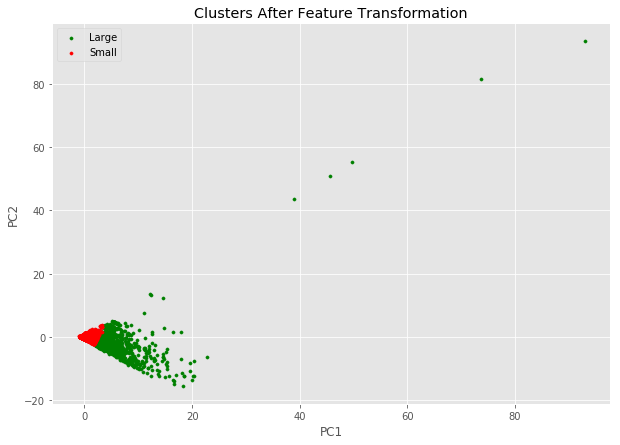

In [54]:
kmeans_plot = KMeans(n_clusters=2,random_state=0)

pca_2 = PCA(n_components=2)

X = pca_2.fit_transform(X_train)

kmeans_plot.fit(X_train)
y_kmeans_2 = kmeans_plot.fit_predict(X_train)

acc= round(100*accuracy_score(y_train,y_kmeans_2),2)

# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 10, c = 'green', label = 'Large')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 10, c = 'red', label = 'Small')
plt.title("Clusters After Feature Transformation")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

In [57]:
model_pca = KMeans(n_clusters=2, random_state=100)
model_pca.fit(pca_X_train)
# VALIDATION
prediction_pca_valid = model_pca.predict(pca_X_train)
valid_pca = accuracy_score(y_train, prediction_pca_valid)
print(accuracy_score(y_train, prediction_pca_valid)*100)
# TEST RESULTS
prediction_pca_test = model_pca.predict(pca_X_test)
test_pca = accuracy_score(y_test, prediction_pca_test)
print(accuracy_score(y_test, prediction_pca_test)*100)

93.54242255093497
93.80545380545381


In [58]:
gmm_acc = GMM_def(pca_X_train, 2)
print(gmm_acc)

76.79


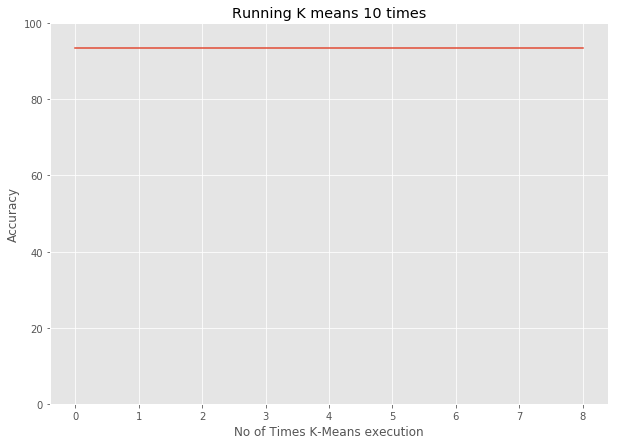

In [59]:
acc_k = []
for i in range(1,10):

    kmeans_multi = KMeans(n_clusters=2,random_state=101)
    kmeans_multi.fit(pca_X_train)

    predictions_multi = kmeans_multi.predict(pca_X_train)
    acc1= round(100*accuracy_score(y_train,predictions_multi),2)

    acc_k.append(acc1)
    
plt.figure(figsize=(10,7))
plt.plot(acc_k)
plt.ylabel("Accuracy")
plt.title("Running K means 10 times")
plt.xlabel("No of Times K-Means execution")
plt.ylim(0,100)
plt.show()

In [60]:
ica = FastICA(n_components=85)

ica_X_train = pd.DataFrame(ica.fit_transform(X_train))
ica_X_test = pd.DataFrame(ica.transform(X_test))

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 16
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


In [61]:
model_ica = KMeans(n_clusters=2, random_state=100)
model_ica.fit(ica_X_train)
# VALIDATION
prediction_ica_valid = model_ica.predict(ica_X_train)
valid_ica = accuracy_score(y_train, prediction_ica_valid)
print(accuracy_score(y_train, prediction_ica_valid)*100)
# TEST RESULTS
prediction_ica_test = model_ica.predict(ica_X_test)
test_ica = accuracy_score(y_test, prediction_ica_test)
print(accuracy_score(y_test, prediction_ica_test)*100)

84.61484789282724
84.55026455026456


In [62]:
ica_acc = GMM_def(ica_X_train,2)
print(ica_acc)

76.79


In [63]:
grp = GaussianRandomProjection(n_components=85, eps=0.1, random_state=420)
rca_X_train = pd.DataFrame(grp.fit_transform(X_train))
rca_X_test = pd.DataFrame(grp.transform(X_test))

/anaconda3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (16 < 85).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


In [64]:
model_rca = KMeans(n_clusters=2, random_state=99)
model_rca.fit(rca_X_train)
# VALIDATION
prediction_rca_valid = model_rca.predict(rca_X_train)
valid_rca = accuracy_score(y_train, prediction_rca_valid)
print(accuracy_score(y_train, prediction_rca_valid)*100)
# TEST RESULTS
prediction_rca_test = model_rca.predict(rca_X_test)
test_rca = accuracy_score(y_test, prediction_rca_test)
print(accuracy_score(y_test, prediction_rca_test)*100)

print(confusion_matrix(y_test,prediction_rca_test))

94.38668713368685
94.38339438339437
[[11503   614]
 [   76    92]]


In [65]:
rca_acc = GMM_def(rca_X_train,2)
print(rca_acc)

Gaussian1 = GaussianMixture(n_components=2,random_state=10)
Gaussian1.fit(X_test)
predictions1 = Gaussian1.predict(X_test)
print(confusion_matrix(y_test,predictions1))

76.79
[[3043 9074]
 [ 143   25]]


In [66]:
validation_scores = [valid_feature, valid_pca, valid_ica, valid_rca]
test_scores = [test_feature, test_pca, test_ica, test_rca]

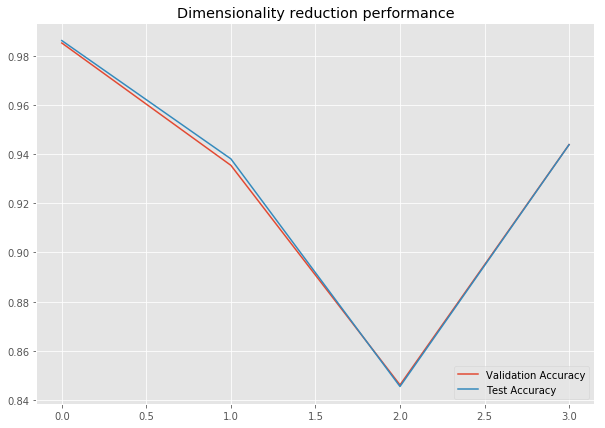

In [67]:
plt.figure(figsize=(10,7))
plt.title("Dimensionality reduction performance")
#plt.xticks('Feature','ICA','PCA','RCA')
plt.plot(validation_scores, label = 'Validation Accuracy')
plt.plot(test_scores, label="Test Accuracy")
plt.legend(loc = "lower right")

In [69]:
classifier = Sequential()

classifier.add(Dense(64, activation= 'relu', input_dim =16))
classifier.add(Dense(16, activation= 'relu'))
classifier.add(Dense(16, activation= 'relu'))
classifier.add(Dense(8, activation= 'relu'))
classifier.add(Dense(1, activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(pca_X_train, y_train, batch_size = 10, epochs = 10, validation_data=(pca_X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 28664 samples, validate on 12285 samples
Epoch 1/10
28664/28664 [==============================] - 7s 231us/step - loss: 0.0489 - acc: 0.9853 - val_loss: 0.0325 - val_acc: 0.9863
Epoch 2/10
28664/28664 [==============================] - 6s 210us/step - loss: 0.0319 - acc: 0.9856 - val_loss: 0.0296 - val_acc: 0.9885
Epoch 3/10
28664/28664 [==============================] - 6s 208us/step - loss: 0.0297 - acc: 0.9870 - val_loss: 0.0346 - val_acc: 0.9886
Epoch 4/10
28664/28664 [==============================] - 6s 209us/step - loss: 0.0283 - acc: 0.9885 - val_loss: 0.0293 - val_acc: 0.9890
Epoch 5/10
28664/28664 [==============================] - 6s 206us/step - loss: 0.0281 - acc: 0.9884 - val_loss: 0.0272 - val_acc: 0.9893
Epoch 6/10
28664/28664 [==============================] - 6s 206us/step - loss: 0.0267 - acc: 0.9894 - val_loss: 0.0262 - val_acc: 0.9897
Epoch 7/10
28664/28664 [==============================] - 6s 208us/step - 

In [70]:
y_pred_relu = classifier.predict(pca_X_test)
y_pred_relu = y_pred_relu > 0.5
print(accuracy_score(y_test,y_pred_relu)*100)
confusion_matrix(y_test,y_pred_relu)

99.006919006919


array([[12088,    29],
       [   93,    75]])

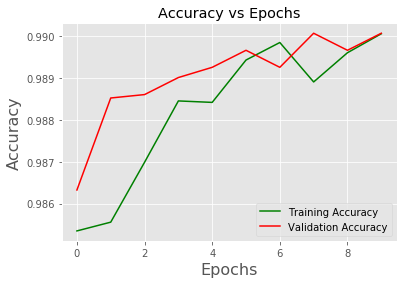

In [71]:
#plt.figure(figsize=(14,10))
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.plot(hist.history['acc'], 'g', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(loc='lower right')
plt.show()

In [86]:
X_train_5 = new_Df.iloc[:, 0:2]
y_5 = new_Df.iloc[:, 2:]